#**Group_219** | **Dataset: Heart attack**
```
Group Member 1: Aman Kushwaha | Bits Id: 2022AC05577
Group Member 2: Vivek Kumar | Bits Id: 2022AC05491
Group Member 3: Roshan Kumar | Bits Id: 2022AC05572
```

# Import Libraries/Dataset
1. Download the dataset
2. Import the required libraries

In [97]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [98]:
data = read_csv('heart.csv')

In [99]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Visualization and Exploration

1. Print 2 rows for sanity check to identify all the features present in the dataset and
    if the target matches with them.

2. Comment on class imbalance with appropriate visualization method.

3. Provide appropriate visualizations to get an insight about the dataset.

4. Do the correlational analysis on the dataset. Provide a visualization for the same.
    Will this correlational analysis affect the feature selection that you will perform in
    the next step? Justify your answer. Answers must have justification to be
    awarded marks.
5. Any other visualisation specific to the problem statement.

In [100]:
# 1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


2. Comment on class imbalance with appropriate visualization method.

Class imbalance in machine learning refers to a situation where the distribution of classes in a classification problem is uneven, with one class having significantly more or fewer instances than the others. This can occur naturally in real-world scenarios or due to biases in data collection. However, class imbalance poses challenges for machine learning algorithms.

We can look into data info for class imbalance and for data visualization as well.

In [101]:
# 3. Provide appropriate visualizations to get an insight about the dataset.
# Information of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [102]:
# Data shape refers to the structure or dimensions of a dataset, providing information about its size and organization.
# In the context of tabular data, such as spreadsheets or database tables, data shape refers to the number of rows and columns in the dataset.
data.shape

(303, 14)

In [103]:
# Columns of dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [104]:
# Analytical information of columns
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Correlation
Below is the correlational analysis on the dataset with a visualization for the same.

In [105]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Justification for correlation analysis.

We are considering [age, trestbps, chol, thalach, oldpeak, ca, target] columns for correlational analysis as they are continuous variables potentially related to heart disease.

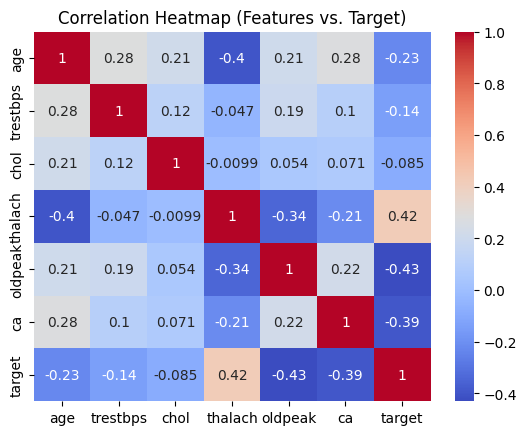

In [106]:
# We can visualize the given problem in the below heat map
# HEAT MAP

# Extract our columns for correlation analysis
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']

# Correlation matrix
correlation_matrix = data[columns].corr()

# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Customize the heatmap
plt.title("Correlation Heatmap (Features vs. Target)")
plt.xticks(rotation=360)
plt.yticks(rotation=90)
plt.show()

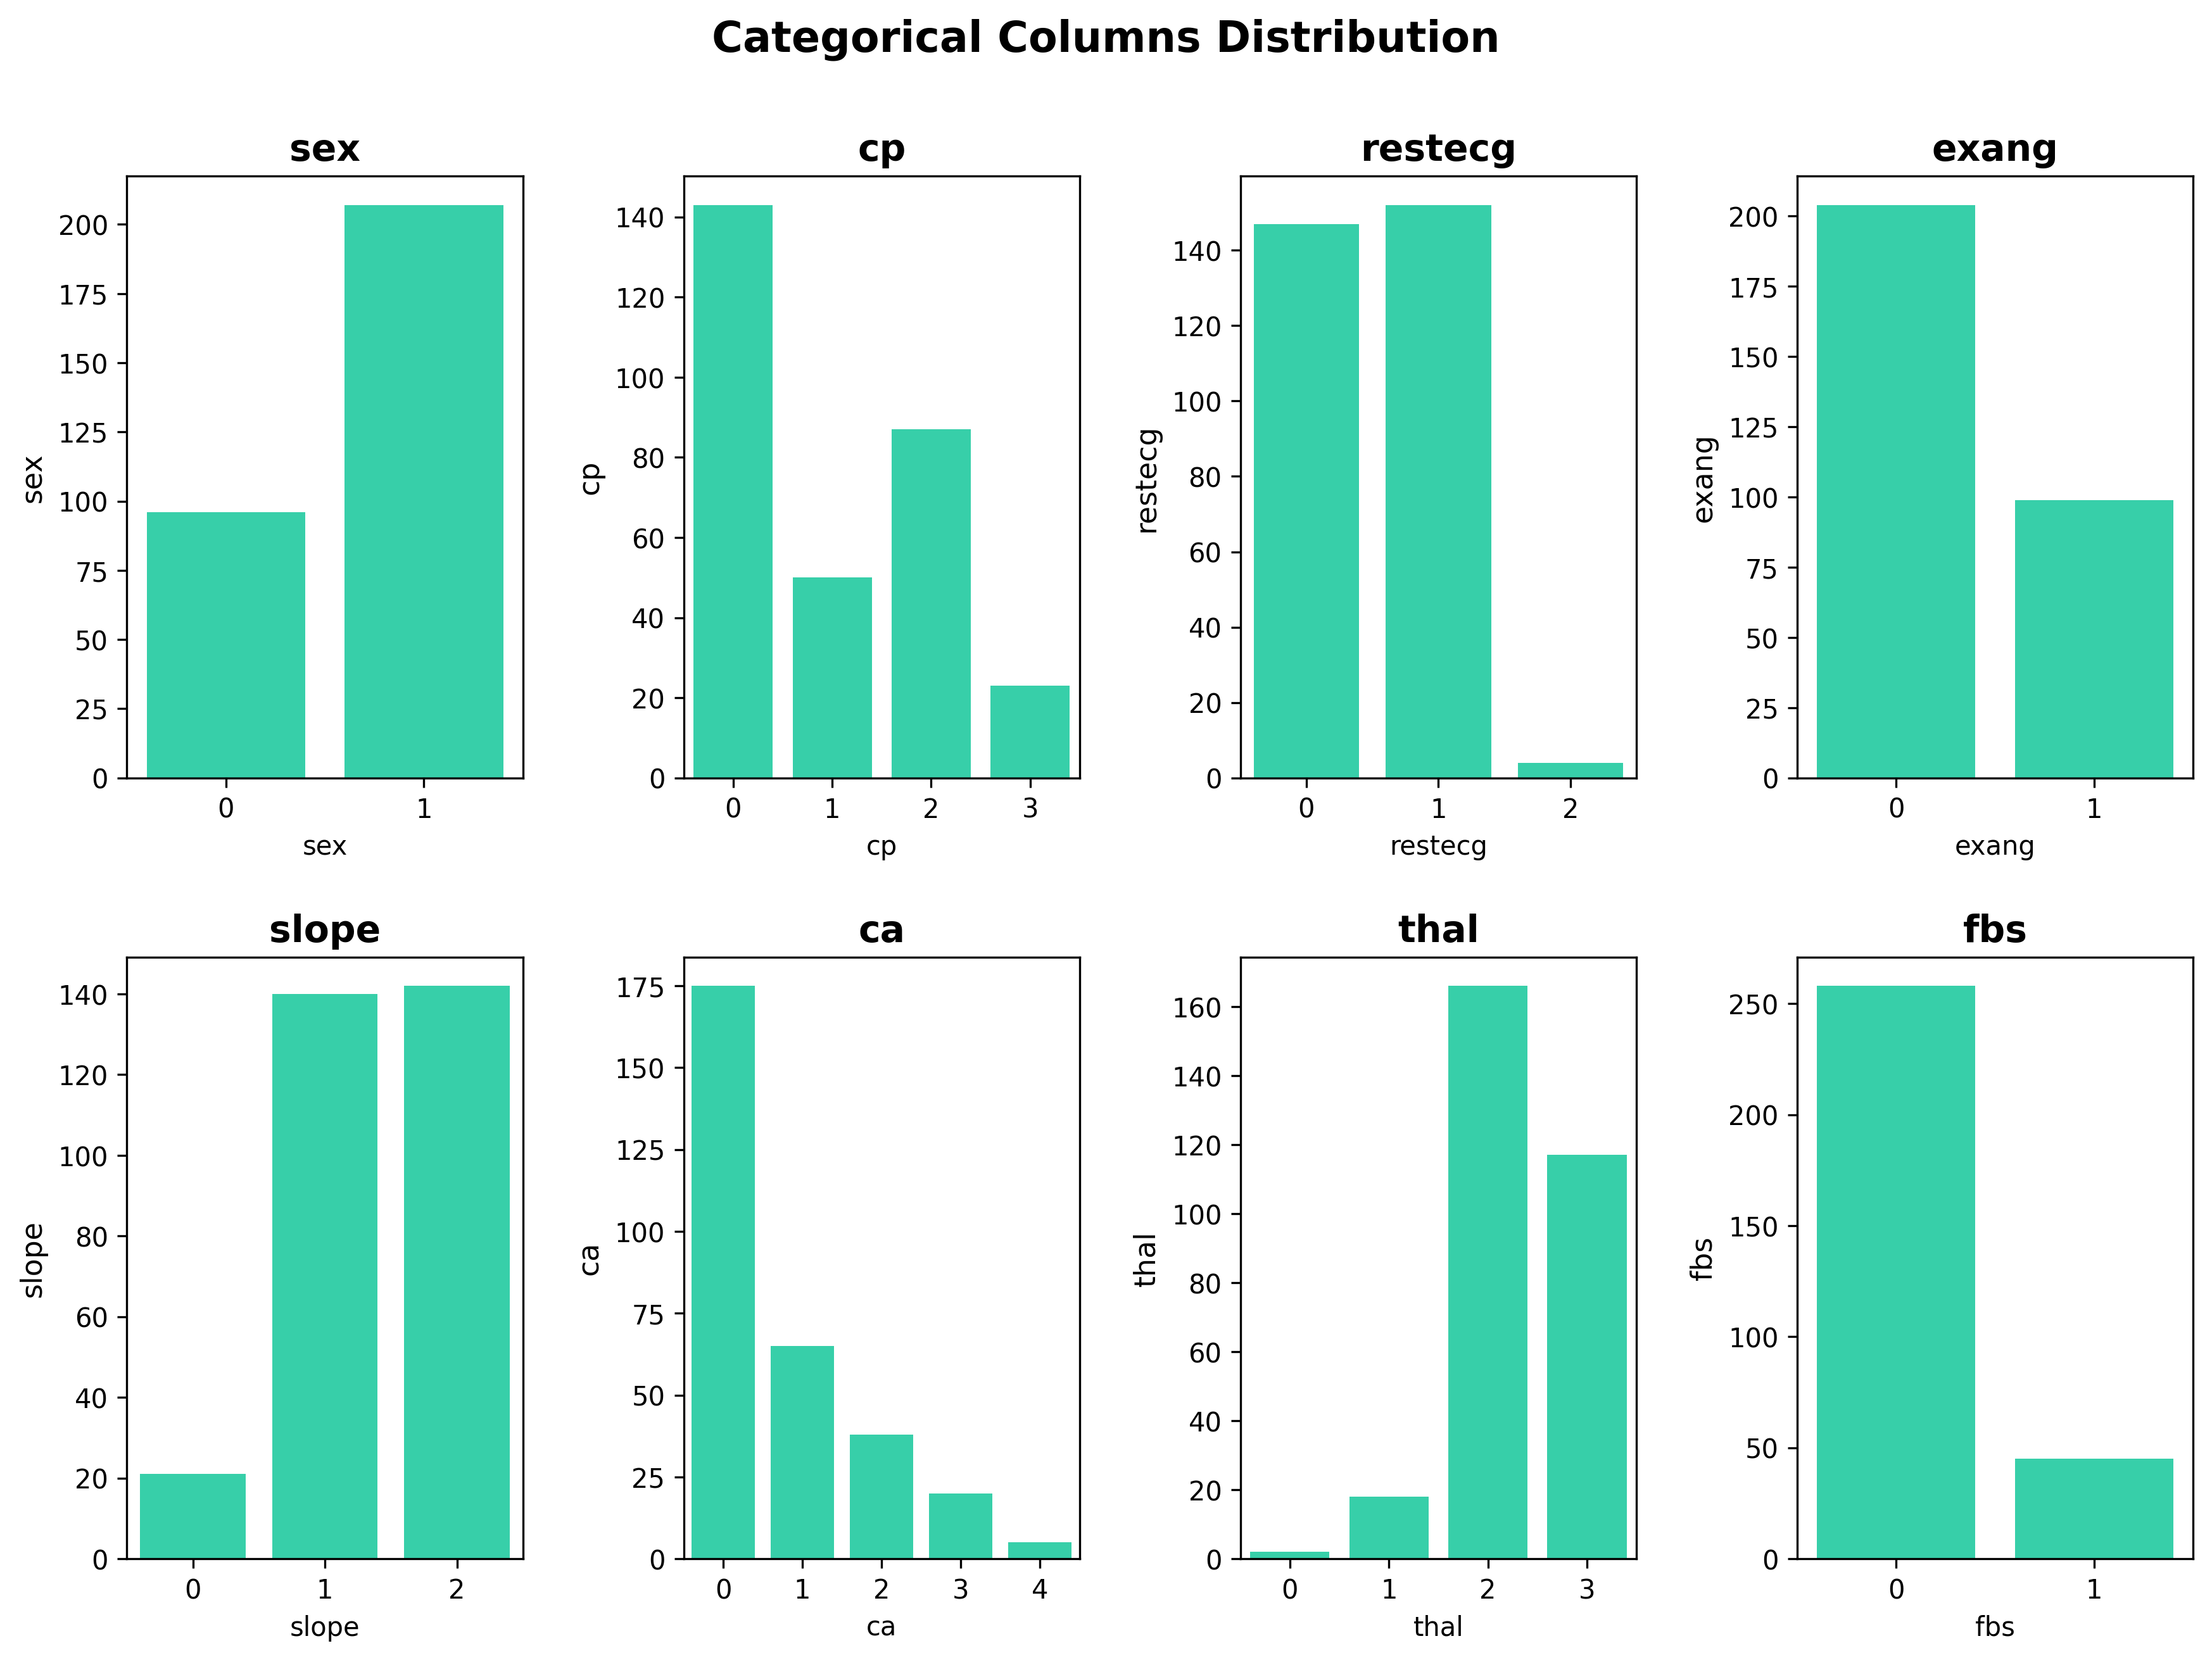

In [107]:
# Ploting Categorical Columns Distribution

cols=['sex','cp','restecg','exang','slope','ca','thal','fbs']

fig=plt.figure(figsize=(12,9),dpi=300)

fig.suptitle('Categorical Columns Distribution', fontweight='bold', fontsize=16)
color='#1DE9B6'
x=1

for i in range(len(cols)):
    fig.add_subplot(2, 4, i+1)
    plt.title(cols[i], fontweight='bold', fontsize=14)
    sns.countplot(data=data, x=cols[i], linewidth=2,color=color)
    plt.ylabel(cols[i], fontsize=11)

fig.tight_layout(pad=2.0)

Columns 'ca', 'restcg', 'thal' seems to have significant outliers. yes, correlational analysis may affect the feature selection.

# Data Pre-processing

### Checking for any NULL values

In [108]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No null values found


### Checking skewness of data

In [109]:
import scipy.stats as stats

skewness = stats.skew(data)

In [110]:
skewness

array([-0.20145969, -0.78741229,  0.4823294 ,  0.71023006,  1.13773262,
        1.97680346,  0.16171657, -0.53474554,  0.73885058,  1.26342552,
       -0.50579573,  1.30392596, -0.47435893, -0.17892962])

In [111]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Data balancing techniques address class imbalance in machine learning datasets. The effects on model evaluation parameters include improved accuracy, precision, recall, F1 score, and AUC-ROC. However, the specific impact depends on the chosen technique and dataset characteristics. Balancing can also affect training time and model complexity. Experimentation and evaluation are essential to determine the effectiveness of different techniques.

# Exploratory Data Analysis

In [115]:
df=data[['sex', 'age', 'target']]
df['sex'].replace({1:'Male',0:'Female'},inplace=True)
df['target'].replace({1:'Heart Patient',0:'Healthy'},inplace=True)

C:\Users\vvksi\AppData\Local\Temp\ipykernel_12016\2715031758.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vvksi\AppData\Local\Temp\ipykernel_12016\2715031758.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "histogram"}, {"type": "histogram"}]])
fig.add_trace(
    go.Histogram(
             x=df['age'].where(df['target']=='Heart Patient'),
             name='Heart Patient',
             nbinsx=20,
             showlegend=False,
             marker={"color": '#f84242'}
             ),
    row=1,col=1
)
fig.add_trace(
     go.Histogram(
             x=df['age'].where(df['target']=='Healthy'),
             name='Healthy',
             nbinsx=20,
             showlegend=False,
             marker={"color": 'white'}
             ),
    row=1,col=1
)
fig.add_trace(
    go.Histogram(
             x=df['sex'].where(df['target']=='Heart Patient'),
             name='Heart Patient',
             nbinsx=20,
             marker={"color": '#f84242'}
             ),
    row=1,col=2
)
fig.add_trace(
     go.Histogram(
             x=df['sex'].where(df['target']=='Healthy'),
             name='Healthy',
             nbinsx=20,
             marker={"color": 'white'}
             ),
    row=1,col=2
)

fig.update_layout(height=500,
                  title_text="<b>Age & Gender Distribution<b>",
                  title_font_size=30,
                  bargap=0.1,
                  template='plotly_dark',
                 )
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_xaxes(title_text="Gender", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.show()

### analysis:
We can see that the risk of heart disease is higher among people of ages upto 54 and is drastically low among adults above 55 years of age
The risk of heart disease is seen to be more prevalent among women than men.

In [93]:
cp1=data.where(data['target']==0).groupby(by=["cp"]).size().reset_index(name="Count")
cp0=data.where(data['target']==1).groupby(by=["cp"]).size().reset_index(name="Count")

cp0['cp'].replace({0:'Type 1',1:'Type 2',2:'Type 3',3:'Type 4'},inplace=True)
cp1['cp'].replace({0:'Type 1',1:'Type 2',2:'Type 3',3:'Type 4'},inplace=True)

df1=data[['thalach','chol','target','age','trestbps']]
df1['targetname']=df1['target'].replace({1:'Heart Patient',0:'Healthy'})

C:\Users\vvksi\AppData\Local\Temp\ipykernel_12016\406386872.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "histogram"}, {"type": "scatter"}]])
fig.add_trace(
    go.Bar(
             x=cp0['cp'],y=cp0.Count,marker={"color": 'white'},name='Healthy'
             ),
    row=1,col=1
)
fig.add_trace(
    go.Bar(
             x=cp1['cp'],y=cp1.Count,marker={"color": '#f84242'},name='Heart Patient'
             ),
    row=1,col=1
)
fig.update_layout(height=500,
                  title_text="<b>Chest Pain & Max Heart Rate<b>",
                  title_font_size=30,
                  bargap=0.1,
                  template='plotly_dark',
                 )
fig.add_trace(
    go.Scatter(x=df1.thalach, y=df1.age, mode='markers', text=df1['targetname'],showlegend=False,
               marker=dict(
               color=df1.target,
               colorscale=['white','#f84242'],
               line_width=1)
              ),
    row=1,col=2
)
fig.update_xaxes(title_text="Chest Pain Type", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_xaxes(title_text="Max. Heart Rate", row=1, col=2)
fig.update_yaxes(title_text="Age", row=1, col=2)

fig.show()

Analysis:
People having type 1 chest pain have a high risk of high disease as compared to other chest pain types
Higher max heart rate among younger candidates is seen to be a major symptom for heart disease

In [95]:
# Here we are visualizing all the coulumns to generate the Heat Map
px.imshow(data.corr(),height=800,color_continuous_scale=px.colors.sequential.matter_r,template='plotly_dark')

# Feature Engineering

> There are various feature engineering techniques. Some commonly used ones are:
1. One-Hot Encoding
2. Standardization and Normalization
3. Feature Interaction
4. Polynomial Features
5. Binning/Discretization
6. Feature Selection
7. Time-Series Features
8. Text Feature Extraction
9. Domain-Specific Feature Engineering
10. Feature Crosses

We have used **standardization** as it prevents feature dominance, improves model convergence, enhances interpretability, handles outliers, and assists certain algorithms. By bringing features to a similar scale, standardization ensures fair comparisons and facilitates optimal model performance.

In [116]:
data=pd.get_dummies(data,columns=['sex','cp','restecg','exang','slope','ca','thal','fbs'])
scaler=StandardScaler()
scaledColumns=['age','trestbps','thalach','oldpeak','chol']
data[scaledColumns]=scaler.fit_transform(data[scaledColumns])
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,fbs_0,fbs_1
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False



# Model Building:

In [49]:
x = data.drop(columns='target',axis=1)
y = data['target']


## Case 1 : Train = 80 % Test = 20% [ x_train2, y_train2] = 80% ; [ x_test2, y_test2] = 20%


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=4)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(242, 30) (61, 30) (242,) (61,)


In [51]:
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,fbs_0,fbs_1
0,0.952197,0.763956,-0.256334,0.015443,1.087338,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,False,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,True,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,False,True,True,False,False,...,False,True,False,False,False,False,False,True,False,True
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,False,True,True,False,False,...,True,False,False,False,False,False,False,True,True,False


In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [53]:
x_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,fbs_0,fbs_1
207,0.621330,1.049520,0.226803,0.321556,1.346147,True,False,True,False,False,...,False,True,False,False,False,False,False,True,True,False
213,0.731619,0.763956,1.173752,-0.159479,-0.034166,True,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
111,0.290464,1.049520,-2.324160,1.021244,-0.724323,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,True
225,1.724218,0.763956,-1.396537,-1.077820,1.346147,False,True,True,False,False,...,False,False,False,False,False,False,False,True,True,False
17,1.283063,1.049520,-0.391612,-1.558855,1.346147,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,1.724218,1.620649,0.439384,-1.646316,1.604955,False,True,False,False,True,...,True,False,False,False,False,False,False,True,True,False
255,-1.033002,0.592617,1.212403,-0.115749,-0.896862,False,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
150,1.283063,1.620649,-0.352961,-0.509323,1.087338,False,True,True,False,False,...,False,False,False,False,False,True,False,False,True,False
204,0.841908,1.620649,-1.589792,-0.203210,4.451851,True,False,True,False,False,...,False,False,True,False,False,False,False,True,True,False


In [54]:
x_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,fbs_0,fbs_1
292,0.400752,2.191778,-0.410938,-0.159479,1.518686,True,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
38,1.172774,1.335085,0.439384,-0.072018,-0.206705,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
26,0.511041,1.049520,-0.662169,0.321556,0.483451,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
286,0.511041,0.135714,-0.816773,0.540209,-0.206705,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
267,-0.591847,-0.778093,-1.879674,-1.034089,-0.206705,False,True,False,False,True,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.731619,0.135714,-0.237008,-0.203210,1.346147,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
280,-1.363869,0.249940,1.328356,-1.077820,0.655990,False,True,True,False,False,...,False,False,False,False,False,True,False,False,True,False
186,0.621330,-0.092738,0.130176,-0.246940,0.310912,False,True,True,False,False,...,True,False,False,False,False,False,False,True,True,False
274,-0.812425,-1.234996,0.555337,-1.383933,-0.034166,False,True,True,False,False,...,True,False,False,False,False,False,True,False,True,False


In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
score = accuracy_score(y_train,train_pred)

print("Train Accuracy Score : ",score*100)
test_pred = model.predict(x_test)
test_score = accuracy_score(y_test,test_pred)
print("Test Accuracy Score : ",test_score*100,'\n\n')





Train Accuracy Score :  88.01652892561982
Test Accuracy Score :  90.1639344262295 




# k-fold cross-validation
K-fold cross-validation is a technique used to evaluate machine learning models. It involves splitting the dataset into K equal-sized folds, training the model K times, and evaluating its performance on each fold. This approach allows for better use of data, reduces bias, facilitates model selection, and provides confidence estimation. Common values for K are 5 or 10. K-fold cross-validation is valuable for assessing and comparing model performance.

In [56]:
lrScore = cross_val_score(model,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",lrScore,'\n')

10-Fold CV Score :  85.11827956989248 




# Evaluation Matrix:

In [57]:
print("Confusion Matrix : \n",confusion_matrix(y_test,test_pred),'\n\n')
print(classification_report(y_test,test_pred))

Confusion Matrix : 
 [[24  4]
 [ 2 31]] 


              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [58]:
confusion = confusion_matrix(y_test, test_pred)
confusion

array([[24,  4],
       [ 2, 31]], dtype=int64)

In [59]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [60]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

'Sensitivity: 0.9393939393939394 | Specifictity: 0.8571428571428571'

## Case 2 : Train = 10 % Test = 90% [ x_train2, y_train2] = 10% ; [ x_test2, y_test2] = 90%


In [61]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.9,stratify=y,random_state=4)
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(30, 30) (273, 30) (30,) (273,)


In [62]:
x_train1

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,fbs_0,fbs_1
157,-2.135891,-0.549641,-1.048678,1.064975,-0.896862,False,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
106,1.613930,1.620649,-0.237008,-0.815437,-0.810592,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,True
270,-0.922713,-0.663867,0.052874,-0.246940,-0.206705,False,True,True,False,False,...,False,False,False,False,False,False,False,True,True,False
296,0.952197,-0.435415,-0.952051,-0.596784,-0.896862,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
98,-1.253580,-0.092738,1.328356,0.540209,0.742260,False,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
191,0.400752,-0.206964,-0.584867,-0.815437,1.001069,False,True,True,False,False,...,False,False,True,False,False,False,False,True,True,False
226,0.841908,-0.663867,0.671289,-2.039891,0.310912,False,True,False,True,False,...,True,False,False,False,False,False,False,True,True,False
245,-0.702136,-0.435415,0.536011,0.715131,-0.465514,False,True,True,False,False,...,False,False,False,False,False,False,False,True,True,False
96,0.841908,0.478391,2.855069,0.321556,0.138373,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
177,1.062485,0.478391,1.714865,0.365287,-0.896862,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [63]:
y_train1

157    1
106    1
270    0
296    0
98     1
191    0
226    0
245    0
96     1
177    0
93     1
68     1
167    0
33     1
229    0
279    0
123    1
184    0
170    0
212    0
115    1
63     1
164    1
290    0
263    0
132    1
14     1
18     1
75     1
160    1
Name: target, dtype: int64

In [64]:
x_test1

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,fbs_0,fbs_1
34,-0.371269,-0.378302,-0.642843,-1.077820,0.310912,False,True,False,False,False,...,True,False,False,False,False,False,True,False,True,False
232,0.069886,1.620649,0.825893,-0.203210,-0.206705,False,True,True,False,False,...,True,False,False,False,False,False,False,True,True,False
155,0.400752,-0.092738,-0.952051,-0.815437,-0.379244,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
19,1.613930,0.478391,-0.140381,0.059173,0.655990,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
76,-0.371269,-0.378302,-0.024428,0.715131,1.173608,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.180175,-0.092738,-0.488239,0.583939,-0.896862,False,True,False,True,False,...,False,False,False,False,False,False,False,True,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
137,0.841908,-0.206964,-0.739471,-0.421862,-0.896862,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True
84,-1.363869,-1.691899,0.362082,-1.209011,-0.379244,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [65]:
y_test1

34     1
232    0
155    1
19     1
76     1
      ..
159    1
4      1
137    1
84     1
301    0
Name: target, Length: 273, dtype: int64

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(x_train1,y_train1)
train_pred1=model1.predict(x_train1)
score=accuracy_score(y_train1,train_pred1)
print("Train Accuracy Score : ",score*100)

test_pred1=model1.predict(x_test1)
test_score=accuracy_score(y_test1,test_pred1)
print("Test Accuracy Score : ",test_score*100,'\n\n')

Train Accuracy Score :  96.66666666666667
Test Accuracy Score :  75.45787545787546 




# k-fold cross-validation

In [67]:
lrScore = cross_val_score(model1,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",lrScore,'\n')

10-Fold CV Score :  85.11827956989248 




# Evaluation Matrix:

In [68]:
print("Confusion Matrix : \n",confusion_matrix(y_test1,test_pred1),'\n\n')
print(classification_report(y_test1,test_pred1))

Confusion Matrix : 
 [[108  16]
 [ 51  98]] 


              precision    recall  f1-score   support

           0       0.68      0.87      0.76       124
           1       0.86      0.66      0.75       149

    accuracy                           0.75       273
   macro avg       0.77      0.76      0.75       273
weighted avg       0.78      0.75      0.75       273



In [69]:
confusion = confusion_matrix(y_test1, test_pred1)
confusion

array([[108,  16],
       [ 51,  98]], dtype=int64)

In [70]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [71]:
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

'Sensitivity: 0.6577181208053692 | Specifictity: 0.8709677419354839'